
# Imports

In [237]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import sklearn
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import scipy.stats as stats
import statistics
import math
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (15,8)

In [2]:
df = pd.read_csv('ad_viz_plotval_data.csv')
df.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/02/2022,AQS,360010005,1,3.0,ug/m3 LC,13,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
1,01/05/2022,AQS,360010005,1,7.9,ug/m3 LC,33,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
2,01/08/2022,AQS,360010005,1,3.9,ug/m3 LC,16,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
3,01/11/2022,AQS,360010005,1,6.1,ug/m3 LC,25,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
4,01/14/2022,AQS,360010005,1,12.7,ug/m3 LC,52,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464


# Data Cleaing

In [3]:
#Removing Duplicates
df=df.drop_duplicates()
df

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/02/2022,AQS,360010005,1,3.0,ug/m3 LC,13,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
1,01/05/2022,AQS,360010005,1,7.9,ug/m3 LC,33,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
2,01/08/2022,AQS,360010005,1,3.9,ug/m3 LC,16,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
3,01/11/2022,AQS,360010005,1,6.1,ug/m3 LC,25,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
4,01/14/2022,AQS,360010005,1,12.7,ug/m3 LC,52,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11074,12/27/2022,AQS,361192004,3,9.3,ug/m3 LC,39,WHITE PLAINS,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,119,Westchester,41.05192,-73.76366
11075,12/28/2022,AQS,361192004,3,12.9,ug/m3 LC,53,WHITE PLAINS,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,119,Westchester,41.05192,-73.76366
11076,12/29/2022,AQS,361192004,3,15.5,ug/m3 LC,58,WHITE PLAINS,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,119,Westchester,41.05192,-73.76366
11077,12/30/2022,AQS,361192004,3,19.1,ug/m3 LC,66,WHITE PLAINS,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,119,Westchester,41.05192,-73.76366


In [4]:
# getting the columns of the dataset
columns = list(df.columns)
columns

['Date',
 'Source',
 'Site ID',
 'POC',
 'Daily Mean PM2.5 Concentration',
 'UNITS',
 'DAILY_AQI_VALUE',
 'Site Name',
 'DAILY_OBS_COUNT',
 'PERCENT_COMPLETE',
 'AQS_PARAMETER_CODE',
 'AQS_PARAMETER_DESC',
 'CBSA_CODE',
 'CBSA_NAME',
 'STATE_CODE',
 'STATE',
 'COUNTY_CODE',
 'COUNTY',
 'SITE_LATITUDE',
 'SITE_LONGITUDE']

Missing values distribution: 
Date                              0.000000
Source                            0.000000
Site ID                           0.000000
POC                               0.000000
Daily Mean PM2.5 Concentration    0.000000
UNITS                             0.000000
DAILY_AQI_VALUE                   0.000000
Site Name                         0.000000
DAILY_OBS_COUNT                   0.000000
PERCENT_COMPLETE                  0.000000
AQS_PARAMETER_CODE                0.000000
AQS_PARAMETER_DESC                0.000000
CBSA_CODE                         0.036465
CBSA_NAME                         0.036465
STATE_CODE                        0.000000
STATE                             0.000000
COUNTY_CODE                       0.000000
COUNTY                            0.000000
SITE_LATITUDE                     0.000000
SITE_LONGITUDE                    0.000000
dtype: float64



<AxesSubplot:>

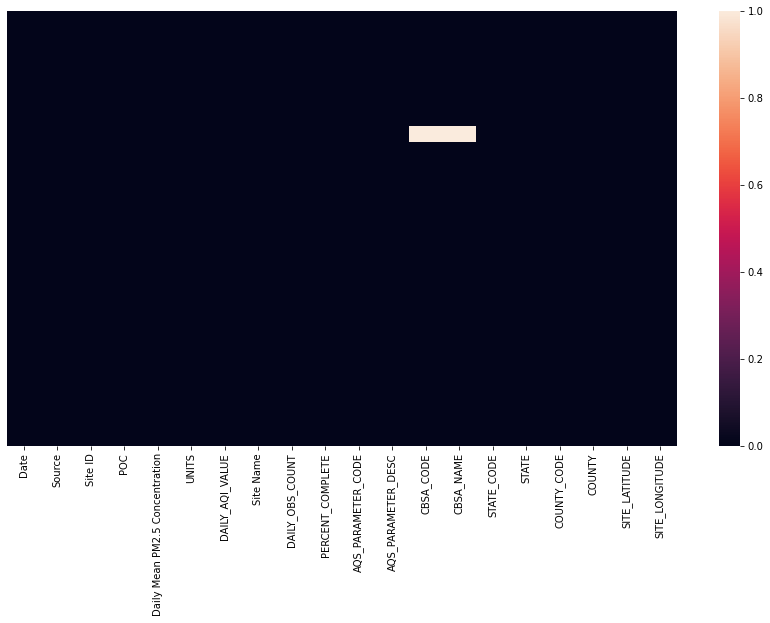

In [5]:
# examining missing values
print("Missing values distribution: ")
print(df.isnull().mean())
print("")
sns.heatmap(df.isnull(),yticklabels=False)

In [6]:
# check datatype in each column
print("Column datatypes: ")
print(df.dtypes)

Column datatypes: 
Date                               object
Source                             object
Site ID                             int64
POC                                 int64
Daily Mean PM2.5 Concentration    float64
UNITS                              object
DAILY_AQI_VALUE                     int64
Site Name                          object
DAILY_OBS_COUNT                     int64
PERCENT_COMPLETE                  float64
AQS_PARAMETER_CODE                  int64
AQS_PARAMETER_DESC                 object
CBSA_CODE                         float64
CBSA_NAME                          object
STATE_CODE                          int64
STATE                              object
COUNTY_CODE                         int64
COUNTY                             object
SITE_LATITUDE                     float64
SITE_LONGITUDE                    float64
dtype: object


In [7]:
df=df.dropna()
df

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/02/2022,AQS,360010005,1,3.0,ug/m3 LC,13,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
1,01/05/2022,AQS,360010005,1,7.9,ug/m3 LC,33,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
2,01/08/2022,AQS,360010005,1,3.9,ug/m3 LC,16,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
3,01/11/2022,AQS,360010005,1,6.1,ug/m3 LC,25,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
4,01/14/2022,AQS,360010005,1,12.7,ug/m3 LC,52,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11074,12/27/2022,AQS,361192004,3,9.3,ug/m3 LC,39,WHITE PLAINS,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,119,Westchester,41.05192,-73.76366
11075,12/28/2022,AQS,361192004,3,12.9,ug/m3 LC,53,WHITE PLAINS,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,119,Westchester,41.05192,-73.76366
11076,12/29/2022,AQS,361192004,3,15.5,ug/m3 LC,58,WHITE PLAINS,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,119,Westchester,41.05192,-73.76366
11077,12/30/2022,AQS,361192004,3,19.1,ug/m3 LC,66,WHITE PLAINS,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,119,Westchester,41.05192,-73.76366


<AxesSubplot:>

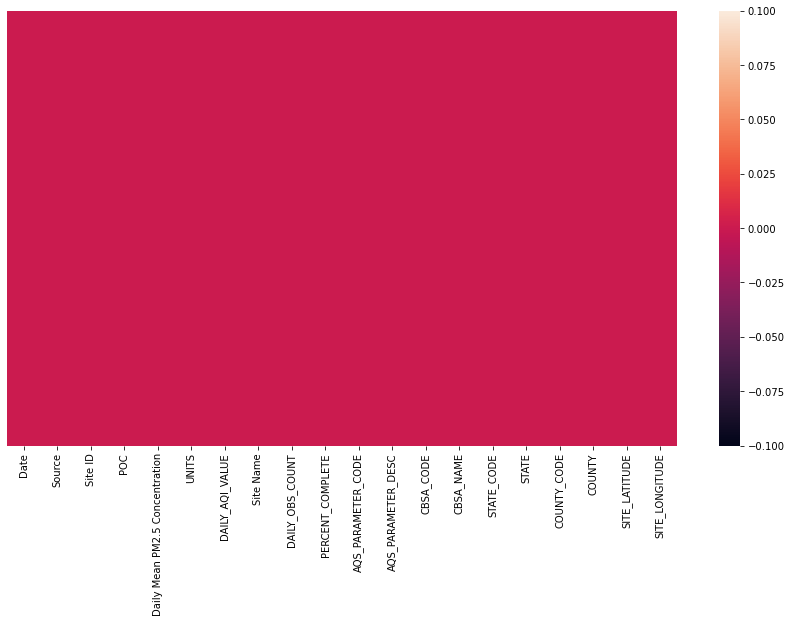

In [8]:
sns.heatmap(df.isnull(),yticklabels=False)

In [9]:
df.describe()

,Site ID,POC,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,CBSA_CODE,STATE_CODE,COUNTY_CODE,SITE_LATITUDE,SITE_LONGITUDE
count,1.067500e+04,10675.000000,10675.000000,10675.000000,10675.0,10675.0,10675.000000,10675.000000,10675.0,10675.000000,10675.000000,10675.000000
mean,3.605811e+08,2.608525,6.434145,26.470258,1.0,100.0,88341.224356,31877.161593,36.0,58.082904,41.638003,-75.118219
std,3.174097e+05,1.055026,3.583471,13.624482,0.0,0.0,196.534587,9908.029891,0.0,31.729053,1.019834,1.921739
min,3.600100e+08,1.000000,-1.400000,0.000000,1.0,100.0,88101.000000,10580.000000,36.0,1.000000,40.580270,-79.318810
25%,3.602910e+08,1.000000,4.000000,17.000000,1.0,100.0,88101.000000,35620.000000,36.0,29.000000,40.739264,-77.209780
50%,3.606101e+08,3.000000,5.800000,24.000000,1.0,100.0,88502.000000,35620.000000,36.0,61.000000,41.051920,-74.008850
75%,3.608101e+08,3.000000,8.200000,34.000000,1.0,100.0,88502.000000,35620.000000,36.0,81.000000,42.876907,-73.821530
max,3.611920e+08,4.000000,46.200000,127.000000,1.0,100.0,88502.000000,46540.000000,36.0,119.000000,43.146180,-73.057540


### Outliers


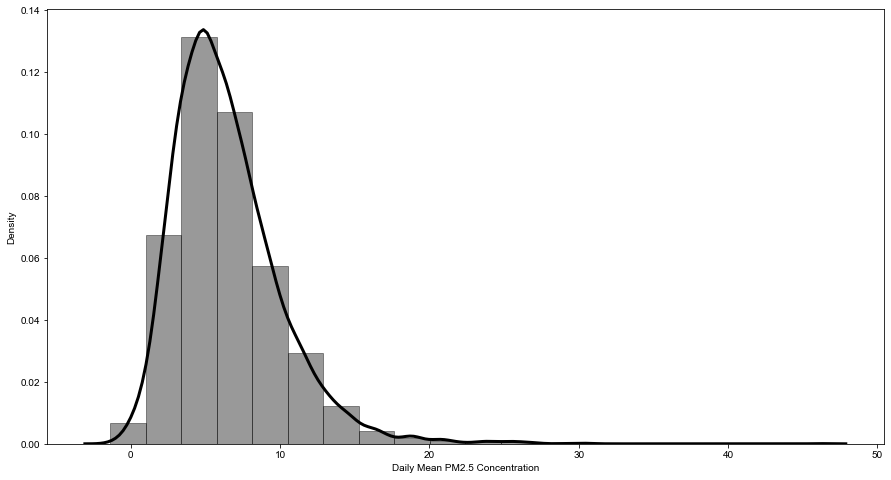

In [10]:
sns.distplot(df['Daily Mean PM2.5 Concentration'], hist=True, kde=True, 
             bins=20, color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
sns.set_style("darkgrid")

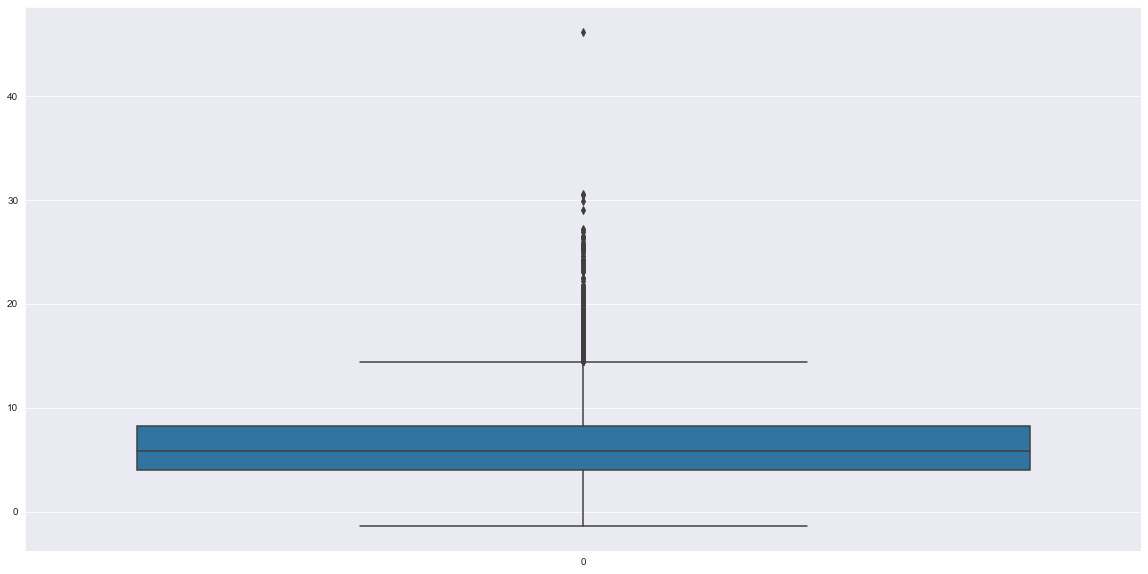

In [11]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = df['Daily Mean PM2.5 Concentration'])
sns.set_style("darkgrid")

In [12]:
df['Daily Mean PM2.5 Concentration'].min()

-1.4

In [13]:
df['Daily Mean PM2.5 Concentration'].max()

46.2

In [14]:
df['Daily Mean PM2.5 Concentration'].describe()

count    10675.000000
mean         6.434145
std          3.583471
min         -1.400000
25%          4.000000
50%          5.800000
75%          8.200000
max         46.200000
Name: Daily Mean PM2.5 Concentration, dtype: float64

In [15]:
upper_limit = df['Daily Mean PM2.5 Concentration'].mean() + 3*df['Daily Mean PM2.5 Concentration'].std()
upper_limit

17.184558504382935

In [16]:
lower_limit = df['Daily Mean PM2.5 Concentration'].mean() - 3*df['Daily Mean PM2.5 Concentration'].std()
lower_limit

-4.316268106256482

In [17]:
df[(df['Daily Mean PM2.5 Concentration'] > upper_limit) | (df['Daily Mean PM2.5 Concentration'] < lower_limit)]

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
37,05/14/2022,AQS,360010005,1,29.0,ug/m3 LC,87,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
111,12/22/2022,AQS,360010005,1,18.6,ug/m3 LC,65,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
171,01/01/2022,AQS,360010005,3,17.4,ug/m3 LC,62,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
183,01/13/2022,AQS,360010005,3,23.1,ug/m3 LC,74,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
198,01/28/2022,AQS,360010005,3,18.9,ug/m3 LC,65,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9908,02/02/2022,AQS,361010003,4,19.6,ug/m3 LC,67,PINNACLE STATE PARK,1,100.0,88101,PM2.5 - Local Conditions,18500.0,"Corning, NY",36,New York,101,Steuben,42.09142,-77.20978
10556,07/21/2022,AQS,361030009,3,18.7,ug/m3 LC,65,HOLTSVILLE,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,103,Suffolk,40.82799,-73.05754
10692,12/04/2022,AQS,361030009,3,19.3,ug/m3 LC,66,HOLTSVILLE,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,103,Suffolk,40.82799,-73.05754
10902,07/05/2022,AQS,361192004,3,24.9,ug/m3 LC,78,WHITE PLAINS,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,119,Westchester,41.05192,-73.76366


In [18]:
df[(df['Daily Mean PM2.5 Concentration'] < upper_limit) & (df['Daily Mean PM2.5 Concentration'] > lower_limit)]

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/02/2022,AQS,360010005,1,3.0,ug/m3 LC,13,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
1,01/05/2022,AQS,360010005,1,7.9,ug/m3 LC,33,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
2,01/08/2022,AQS,360010005,1,3.9,ug/m3 LC,16,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
3,01/11/2022,AQS,360010005,1,6.1,ug/m3 LC,25,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
4,01/14/2022,AQS,360010005,1,12.7,ug/m3 LC,52,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11073,12/26/2022,AQS,361192004,3,8.4,ug/m3 LC,35,WHITE PLAINS,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,119,Westchester,41.05192,-73.76366
11074,12/27/2022,AQS,361192004,3,9.3,ug/m3 LC,39,WHITE PLAINS,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,119,Westchester,41.05192,-73.76366
11075,12/28/2022,AQS,361192004,3,12.9,ug/m3 LC,53,WHITE PLAINS,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,119,Westchester,41.05192,-73.76366
11076,12/29/2022,AQS,361192004,3,15.5,ug/m3 LC,58,WHITE PLAINS,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,119,Westchester,41.05192,-73.76366


In [19]:
df_no_outlier_std_dev = df[(df['Daily Mean PM2.5 Concentration'] < upper_limit) & (df['Daily Mean PM2.5 Concentration'] > lower_limit)]
df_no_outlier_std_dev.shape

(10545, 20)

In [20]:
df.shape[0] - df_no_outlier_std_dev.shape[0] 

130

In [21]:
df = df_no_outlier_std_dev
df

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/02/2022,AQS,360010005,1,3.0,ug/m3 LC,13,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
1,01/05/2022,AQS,360010005,1,7.9,ug/m3 LC,33,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
2,01/08/2022,AQS,360010005,1,3.9,ug/m3 LC,16,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
3,01/11/2022,AQS,360010005,1,6.1,ug/m3 LC,25,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
4,01/14/2022,AQS,360010005,1,12.7,ug/m3 LC,52,ALBANY COUNTY HEALTH DEPT,1,100.0,88101,PM2.5 - Local Conditions,10580.0,"Albany-Schenectady-Troy, NY",36,New York,1,Albany,42.64225,-73.75464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11073,12/26/2022,AQS,361192004,3,8.4,ug/m3 LC,35,WHITE PLAINS,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,119,Westchester,41.05192,-73.76366
11074,12/27/2022,AQS,361192004,3,9.3,ug/m3 LC,39,WHITE PLAINS,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,119,Westchester,41.05192,-73.76366
11075,12/28/2022,AQS,361192004,3,12.9,ug/m3 LC,53,WHITE PLAINS,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,119,Westchester,41.05192,-73.76366
11076,12/29/2022,AQS,361192004,3,15.5,ug/m3 LC,58,WHITE PLAINS,1,100.0,88502,Acceptable PM2.5 AQI & Speciation Mass,35620.0,"New York-Newark-Jersey City, NY-NJ-PA",36,New York,119,Westchester,41.05192,-73.76366


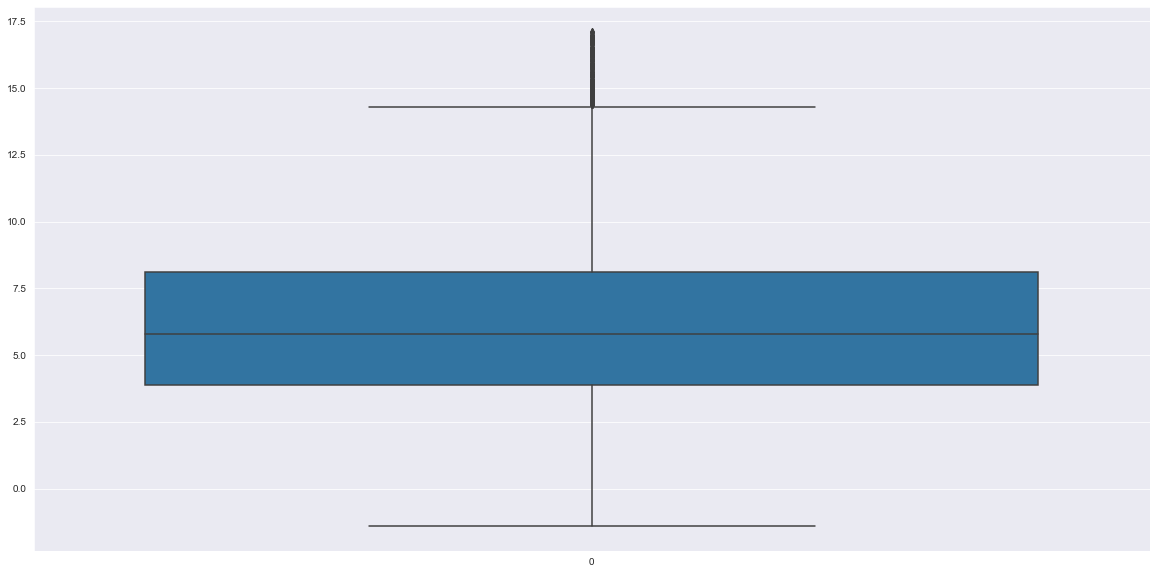

In [22]:
plt.figure(figsize = (20, 10))
sns.boxplot(data = df['Daily Mean PM2.5 Concentration'])
sns.set_style("darkgrid")

# Descriptive Statistics

## Frequency

In [23]:
np.histogram(df['Daily Mean PM2.5 Concentration'], density=False)

(array([  93,  772, 2058, 2553, 2199, 1395,  750,  403,  226,   96],
       dtype=int64),
 array([-1.4 ,  0.45,  2.3 ,  4.15,  6.  ,  7.85,  9.7 , 11.55, 13.4 ,
        15.25, 17.1 ]))

## Central Tendency

## Mean

In [24]:
df.mean()

Site ID                           3.605820e+08
POC                               2.605216e+00
Daily Mean PM2.5 Concentration    6.250896e+00
DAILY_AQI_VALUE                   2.592878e+01
DAILY_OBS_COUNT                   1.000000e+00
PERCENT_COMPLETE                  1.000000e+02
AQS_PARAMETER_CODE                8.834160e+04
CBSA_CODE                         3.190092e+04
STATE_CODE                        3.600000e+01
COUNTY_CODE                       5.817402e+01
SITE_LATITUDE                     4.163832e+01
SITE_LONGITUDE                   -7.511621e+01
dtype: float64

In [25]:
df['Daily Mean PM2.5 Concentration'].mean()

6.250896159317207

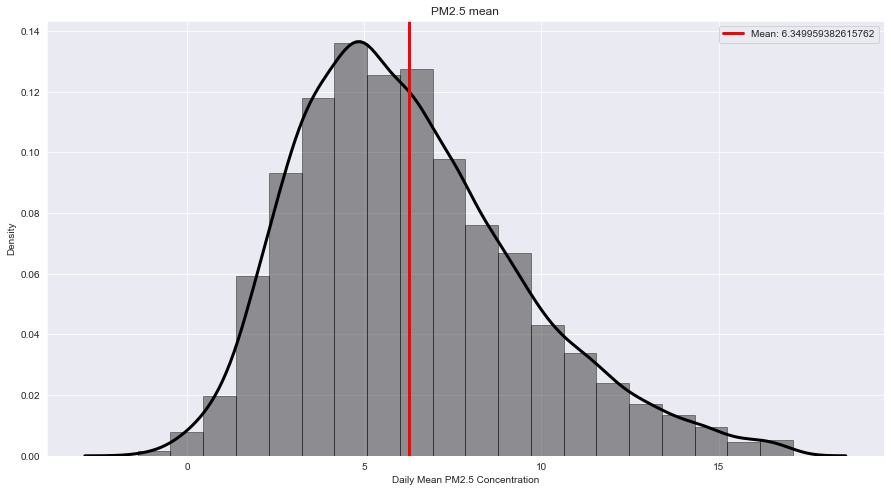

In [26]:
sns.distplot(df['Daily Mean PM2.5 Concentration'], hist=True, kde=True, 
             bins=20, color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
sns.set_style("darkgrid")
plt.axvline(df['Daily Mean PM2.5 Concentration'].mean(),lw=3,color= 'red',label=f'Mean: 6.349959382615762')
plt.title('PM2.5 mean')
plt.legend();

## Median 

In [27]:
statistics.median(df['Daily Mean PM2.5 Concentration'])

5.8

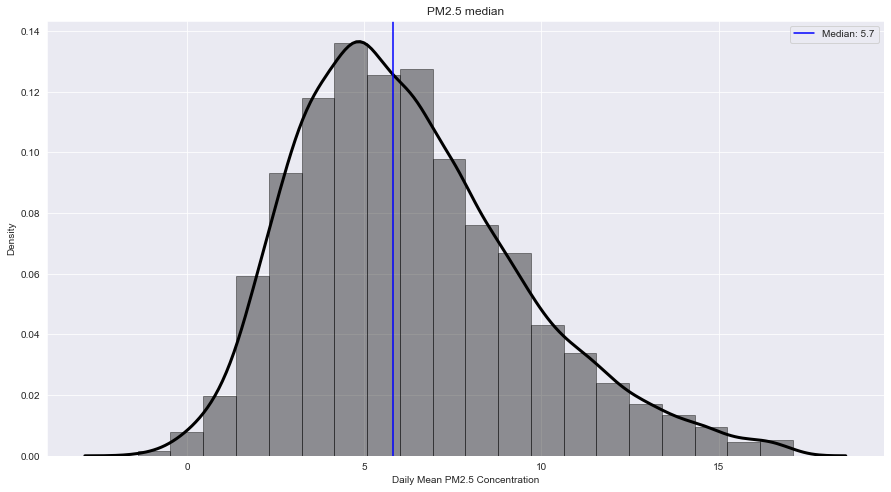

In [28]:
sns.distplot(df['Daily Mean PM2.5 Concentration'], hist=True, kde=True, 
             bins=20, color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
sns.set_style("darkgrid")
plt.axvline(statistics.median(df['Daily Mean PM2.5 Concentration']),color= 'blue', label=f'Median: 5.7')
plt.title('PM2.5 median')
plt.legend()

## Mode

In [29]:
statistics.mode(df['Daily Mean PM2.5 Concentration'])

4.7

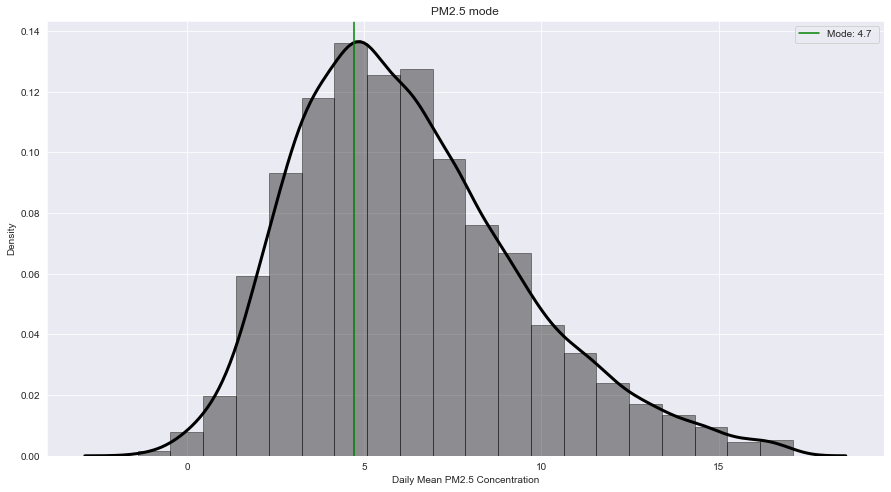

In [30]:
sns.distplot(df['Daily Mean PM2.5 Concentration'], hist=True, kde=True, 
             bins=20, color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
sns.set_style("darkgrid")
plt.axvline(statistics.mode(df['Daily Mean PM2.5 Concentration']),color= 'green', 
            label=f'Mode: 4.7 ')
plt.title('PM2.5 mode')
plt.legend()

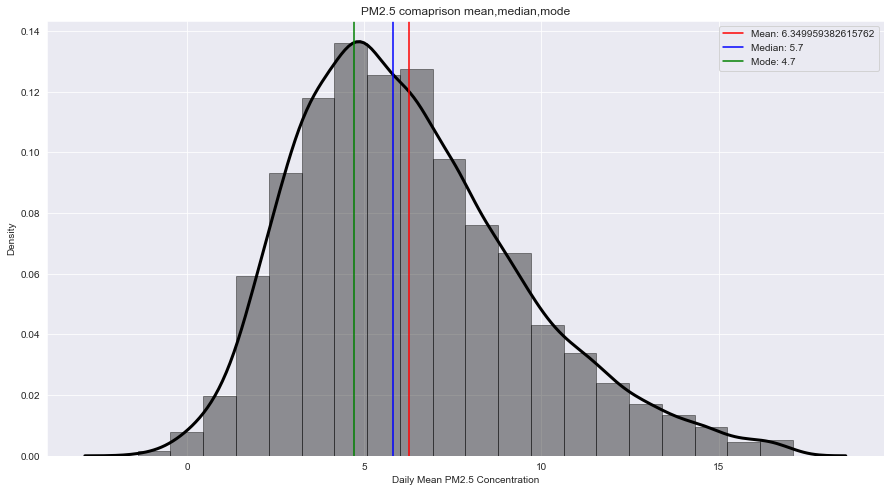

In [31]:
sns.distplot(df['Daily Mean PM2.5 Concentration'], hist=True, kde=True, 
             bins=20, color = 'black', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})
sns.set_style("darkgrid")
plt.axvline(df['Daily Mean PM2.5 Concentration'].mean(),color= 'red', label=f'Mean: 6.349959382615762')
plt.axvline(statistics.median(df['Daily Mean PM2.5 Concentration']),color= 'blue', label=f'Median: 5.7')
plt.axvline(statistics.mode(df['Daily Mean PM2.5 Concentration']),color= 'green', label=f'Mode: 4.7')
plt.title('PM2.5 comaprison mean,median,mode')
plt.legend()

## Measure of Variability

## Range

In [32]:
numeric_data = df.select_dtypes(exclude='object')
categorical_data = df.select_dtypes(include='object')

In [33]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10545 entries, 0 to 11078
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Site ID                         10545 non-null  int64  
 1   POC                             10545 non-null  int64  
 2   Daily Mean PM2.5 Concentration  10545 non-null  float64
 3   DAILY_AQI_VALUE                 10545 non-null  int64  
 4   DAILY_OBS_COUNT                 10545 non-null  int64  
 5   PERCENT_COMPLETE                10545 non-null  float64
 6   AQS_PARAMETER_CODE              10545 non-null  int64  
 7   CBSA_CODE                       10545 non-null  float64
 8   STATE_CODE                      10545 non-null  int64  
 9   COUNTY_CODE                     10545 non-null  int64  
 10  SITE_LATITUDE                   10545 non-null  float64
 11  SITE_LONGITUDE                  10545 non-null  float64
dtypes: float64(5), int64(7)
memory u

In [34]:
for col in numeric_data.columns:
    range = df[col].max() - df[col].min()
    print('range of %s : %d'%(col,range))

range of Site ID : 1181999
range of POC : 3
range of Daily Mean PM2.5 Concentration : 18
range of DAILY_AQI_VALUE : 62
range of DAILY_OBS_COUNT : 0
range of PERCENT_COMPLETE : 0
range of AQS_PARAMETER_CODE : 401
range of CBSA_CODE : 35960
range of STATE_CODE : 0
range of COUNTY_CODE : 118
range of SITE_LATITUDE : 2
range of SITE_LONGITUDE : 6


In [35]:
df['Daily Mean PM2.5 Concentration'].max()

17.1

In [36]:
df['Daily Mean PM2.5 Concentration'].min()

-1.4

In [37]:
df['Daily Mean PM2.5 Concentration'].max() - df['Daily Mean PM2.5 Concentration'].min()

18.5

In [38]:
stats.zscore(df['Daily Mean PM2.5 Concentration'])

0       -1.025146
1        0.520033
2       -0.741338
3       -0.047584
4        2.033678
           ...   
11073    0.677704
11074    0.961513
11075    2.096746
11076    2.916637
11078    2.222883
Name: Daily Mean PM2.5 Concentration, Length: 10545, dtype: float64

In [39]:
df['Daily Mean PM2.5 Concentration'].describe()

count    10545.000000
mean         6.250896
std          3.171304
min         -1.400000
25%          3.900000
50%          5.800000
75%          8.100000
max         17.100000
Name: Daily Mean PM2.5 Concentration, dtype: float64

In [40]:
df['Daily Mean PM2.5 Concentration'].quantile(0.75) - df['Daily Mean PM2.5 Concentration'].quantile(0.25)

4.199999999999999

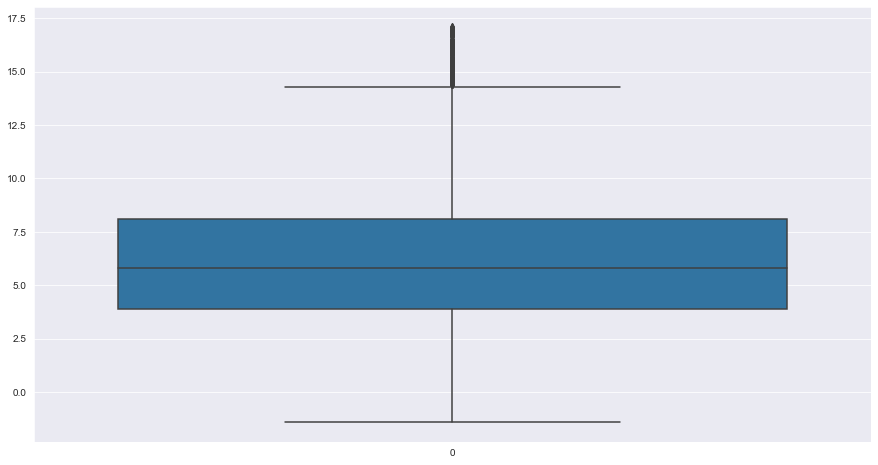

In [41]:
sns.boxplot(data = df['Daily Mean PM2.5 Concentration'])
sns.set_style("darkgrid")

## Variance

In [42]:
statistics.variance(df['Daily Mean PM2.5 Concentration'])

10.057167491587107

### Standard Deviation 

In [43]:
df['Daily Mean PM2.5 Concentration'].std()

3.171303752652369

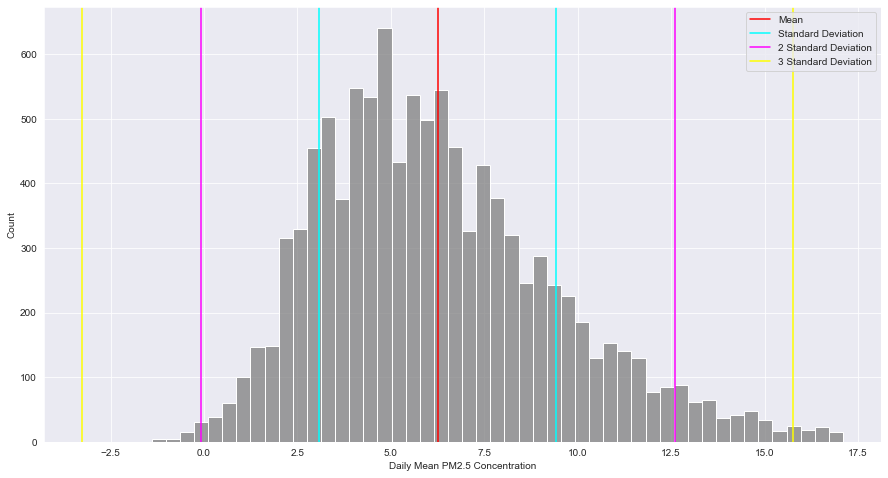

In [44]:
sns.histplot(df['Daily Mean PM2.5 Concentration'],color = 'grey')
sns.set_style("darkgrid")
plt.axvline(df['Daily Mean PM2.5 Concentration'].mean(),color='red',label=f'Mean')
plt.axvline(df['Daily Mean PM2.5 Concentration'].mean() + df['Daily Mean PM2.5 Concentration'].std(),color='cyan',
            label=f'Standard Deviation')
plt.axvline(df['Daily Mean PM2.5 Concentration'].mean() - df['Daily Mean PM2.5 Concentration'].std(),color='cyan')
plt.axvline(df['Daily Mean PM2.5 Concentration'].mean() + 2*(df['Daily Mean PM2.5 Concentration'].std()),color='magenta',
            label=f'2 Standard Deviation')
plt.axvline(df['Daily Mean PM2.5 Concentration'].mean() - 2*(df['Daily Mean PM2.5 Concentration'].std()),color='magenta')
plt.axvline(df['Daily Mean PM2.5 Concentration'].mean() + 3*(df['Daily Mean PM2.5 Concentration'].std()),color='yellow',
            label=f'3 Standard Deviation')
plt.axvline(df['Daily Mean PM2.5 Concentration'].mean() - 3*(df['Daily Mean PM2.5 Concentration'].std()),color='yellow')
plt.legend()

In [45]:
df['Daily Mean PM2.5 Concentration'].mad()

2.520730487169056

In [46]:
df['Daily Mean PM2.5 Concentration'].var

<bound method NDFrame._add_numeric_operations.<locals>.var of 0         3.0
1         7.9
2         3.9
3         6.1
4        12.7
         ... 
11073     8.4
11074     9.3
11075    12.9
11076    15.5
11078    13.3
Name: Daily Mean PM2.5 Concentration, Length: 10545, dtype: float64>

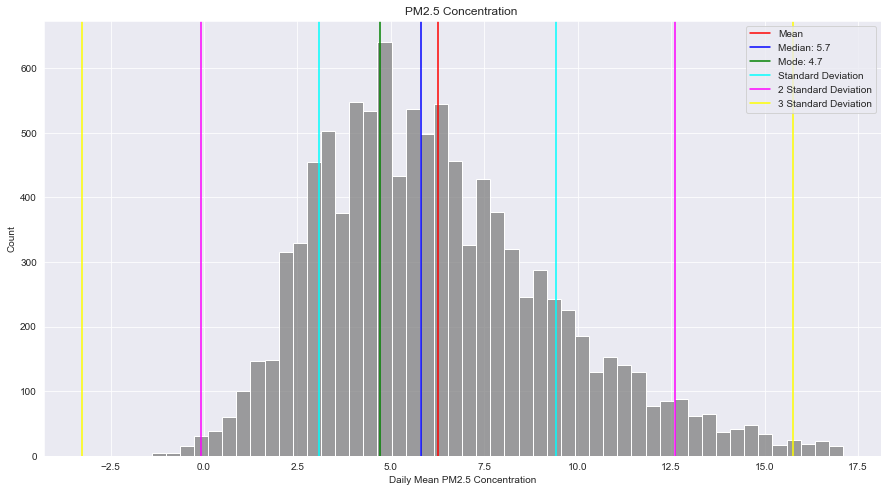

In [47]:
sns.histplot(df['Daily Mean PM2.5 Concentration'],color = 'grey')
plt.axvline(df['Daily Mean PM2.5 Concentration'].mean(),color='red',label=f'Mean')
plt.axvline(statistics.median(df['Daily Mean PM2.5 Concentration']),color= 'blue', label=f'Median: 5.7')
plt.axvline(statistics.mode(df['Daily Mean PM2.5 Concentration']),color= 'green', label=f'Mode: 4.7')
plt.axvline(df['Daily Mean PM2.5 Concentration'].mean() + df['Daily Mean PM2.5 Concentration'].std(),color='cyan',
            label=f'Standard Deviation')
plt.axvline(df['Daily Mean PM2.5 Concentration'].mean() - df['Daily Mean PM2.5 Concentration'].std(),color='cyan')
plt.axvline(df['Daily Mean PM2.5 Concentration'].mean() + 2*(df['Daily Mean PM2.5 Concentration'].std()),color='magenta',
            label=f'2 Standard Deviation')
plt.axvline(df['Daily Mean PM2.5 Concentration'].mean() - 2*(df['Daily Mean PM2.5 Concentration'].std()),color='magenta')
plt.axvline(df['Daily Mean PM2.5 Concentration'].mean() + 3*(df['Daily Mean PM2.5 Concentration'].std()),color='yellow',
            label=f'3 Standard Deviation')
plt.axvline(df['Daily Mean PM2.5 Concentration'].mean() - 3*(df['Daily Mean PM2.5 Concentration'].std()),color='yellow')

plt.title('PM2.5 Concentration ')
plt.legend()

## Skewness and Kurtosis

### Skewness 

In [48]:
df.skew()

Site ID                          -0.266295
POC                              -0.550369
Daily Mean PM2.5 Concentration    0.681670
DAILY_AQI_VALUE                   0.522122
DAILY_OBS_COUNT                   0.000000
PERCENT_COMPLETE                  0.000000
AQS_PARAMETER_CODE               -0.408306
CBSA_CODE                        -0.997565
STATE_CODE                        0.000000
COUNTY_CODE                      -0.266803
SITE_LATITUDE                     0.448545
SITE_LONGITUDE                   -1.015510
dtype: float64

In [49]:
df['Daily Mean PM2.5 Concentration'].skew()

0.6816696038861196

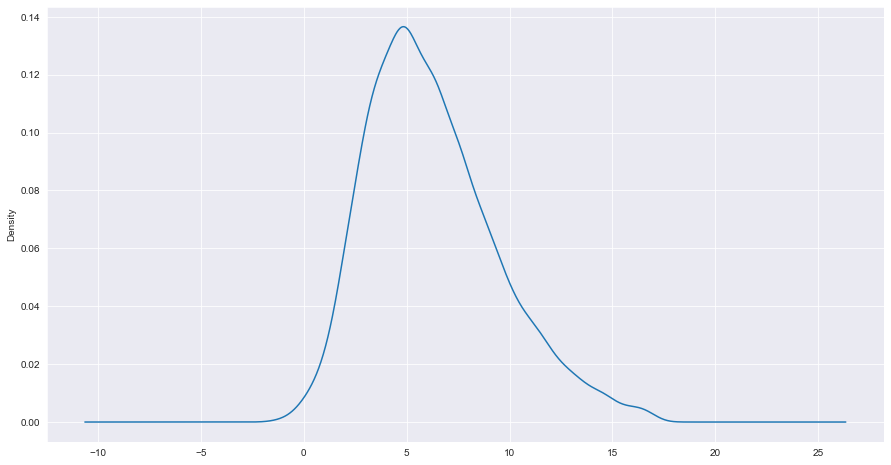

In [50]:
df['Daily Mean PM2.5 Concentration'].plot(kind = 'density')
sns.set_style("darkgrid")

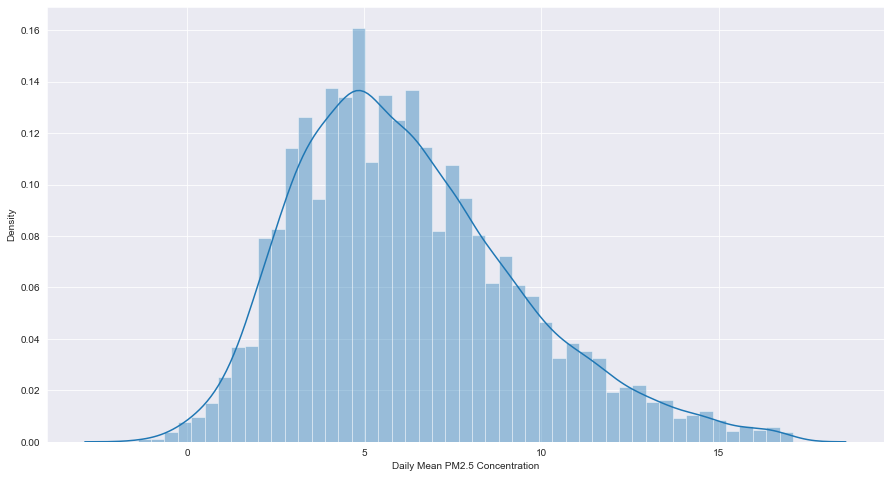

In [51]:
sns.distplot(df['Daily Mean PM2.5 Concentration'],hist=True,kde=True)
sns.set_style("darkgrid")

### Kurtosis

In [52]:
df.kurt()

Site ID                          -0.726640
POC                              -1.026572
Daily Mean PM2.5 Concentration    0.280624
DAILY_AQI_VALUE                  -0.245302
DAILY_OBS_COUNT                   0.000000
PERCENT_COMPLETE                  0.000000
AQS_PARAMETER_CODE               -1.833634
CBSA_CODE                        -0.251842
STATE_CODE                        0.000000
COUNTY_CODE                      -0.729558
SITE_LATITUDE                    -1.619091
SITE_LONGITUDE                   -0.612897
dtype: float64

In [53]:
df['Daily Mean PM2.5 Concentration'].kurt()

0.2806239943354707

<Figure size 1080x576 with 0 Axes>

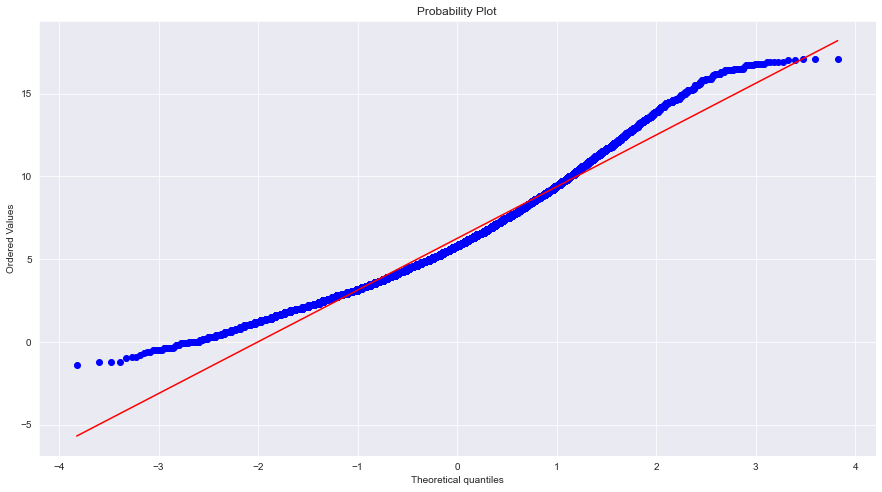

<Figure size 1080x576 with 0 Axes>

In [54]:
stats.probplot(df['Daily Mean PM2.5 Concentration'],plot=plt)
sns.set_style("darkgrid")
plt.figure()

# Inferential Statistics

###  2 Sample T-Test 

In [116]:
#samples
sample1 = df['Daily Mean PM2.5 Concentration'].sample(1956, random_state = 0)
sample1

5324     10.5
1691     10.5
2039      3.9
10892     8.0
6505      7.1
         ... 
7057     10.5
7581      0.6
9660      0.0
8256     11.3
10944     2.3
Name: Daily Mean PM2.5 Concentration, Length: 1956, dtype: float64

In [117]:
sample2 = df.sample(1956, random_state = 1)
sample2

5658     5.1
6343     3.5
10839    4.2
1186     9.4
2289     7.7
        ... 
2810     8.2
1157     6.6
2748     2.0
1787     5.7
7204     5.7
Name: Daily Mean PM2.5 Concentration, Length: 1956, dtype: float64

In [197]:
aa = pd.DataFrame(sample1)
aa

,Daily Mean PM2.5 Concentration
5324,10.5
1691,10.5
2039,3.9
10892,8.0
6505,7.1
...,...
7057,10.5
7581,0.6
9660,0.0
8256,11.3


In [199]:
bb = pd.DataFrame(sample2)
bb

,Daily Mean PM2.5 Concentration
5658,5.1
6343,3.5
10839,4.2
1186,9.4
2289,7.7
...,...
2810,8.2
1157,6.6
2748,2.0
1787,5.7


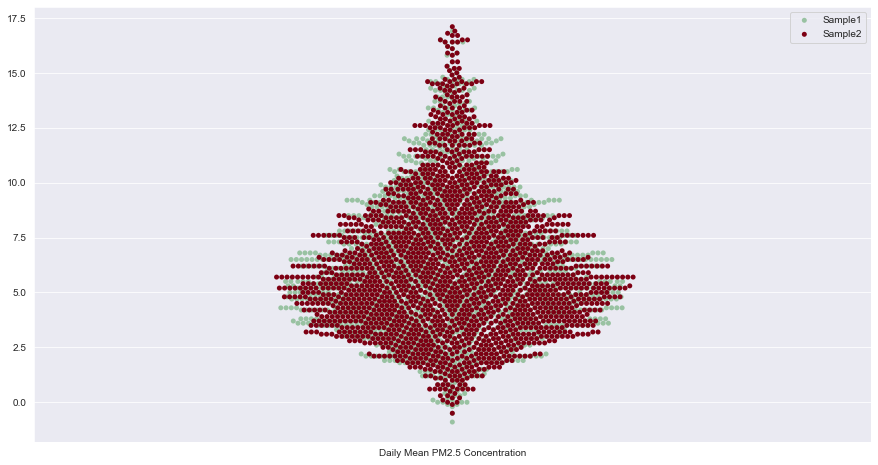

In [200]:
ax = sns.swarmplot( data=aa, color='#99c2a2')
bx = sns.swarmplot(data=bb, color='#7d0013')
plt.legend(labels = ['Sample1', 'Sample2'])
plt.show()

In [210]:
stats.ttest_ind(a=sample1 , b=sample2)


Ttest_indResult(statistic=1.001452306232208, pvalue=0.3166701579832451)